In [4]:
import networkx as nx
import matplotlib.pyplot as plt

import itertools as it

In [5]:
fname = r"build/firstmap.txt"

f = open(fname,"r")
lines = f.readlines()

for line in lines:
    print(line, end="")


NMNMNNNM?NNMNNN?NM$NNNMM?NMNM?MN?NMNRRNNRNMNEMN?MR$NM?NMTNTTNTNNMM?NNMNNMRN?NNRMN?NNNEM?NNNNMMFNNNNNRNRNN0,3,0,16,0,0,0,2,2,0,0,24,0,0,0,2,0,12,40,0,0,0,3,2,20,0,64,0,2,4,4,0,32,0,32,0,1,12,0,0,96,0,1,0,10,8,0,16,64,1,1,0,12,8,0,32,2,0,4,12,0,64,0,0,4,4,8,0,0,32,0,0,6,4,0,16,0,0,2,14,0,8,0,0,0,6,8,8,0,0,0,0,4,4,20,0,0,0,0,0,8,0,8,0,0,

In [6]:
REPOS = lambda node: (node[0]*5, node[1]*20)
COLORS = {"M":"red", "E":"purple", "F":"black", "B":"black", "$":"yellow", "R":"green", "?":"blue", "T":"pink"}

def mapGraph(line):
    label_str = line[:105]
    arr = line[105:].split(",")
    arr = [int(arr[i]) for i in range(105)]
    print(len(label_str), label_str)
    print(len(arr), arr)
    
    adj_map = dict()
    pos_map = dict()
    label_map = dict()
    D = nx.DiGraph()
    
    color_map = []
    
    i = 0
    for y in range(15):
        for x in range(7):
            if label_str[i] != "N":
                node = (x,y)
                label_map[node] = label_str[i]
                adj_map[node] = arr[i]
                pos_map[node] = REPOS(node)
                D.add_node(node)
                
                color_map.append(COLORS[label_map[node]])
                
            i += 1
    BOSS = (3, 15)
    label_map[BOSS] = "B"
    adj_map[BOSS] = 0
    pos_map[BOSS] = REPOS(BOSS)
    D.add_node(BOSS)
    
    color_map.append(COLORS[label_map[BOSS]])
    
    
    i = 0
    for node in adj_map:
        (x,y) = node
        for x2 in range(7):
            if (1<<x2) & adj_map[node]:
                node2 = (x2, y+1)
                #print(node, "~", x2, "... node2 in D?", node2 in D.nodes())
                size1 = len(D.nodes())
                D.add_edge(node, node2)
                #print("D size same?", size1 == len(D.nodes()))
    
    #print(len(D.nodes()), "vertices...")
    #print(D.nodes())
    return D, label_map, pos_map, color_map

105 NMNMNNNM?NNMNNN?NM$NNNMM?NMNM?MN?NMNRRNNRNMNEMN?MR$NM?NMTNTTNTNNMM?NNMNNMRN?NNRMN?NNNEM?NNNNMMFNNNNNRNRNN
105 [0, 3, 0, 16, 0, 0, 0, 2, 2, 0, 0, 24, 0, 0, 0, 2, 0, 12, 40, 0, 0, 0, 3, 2, 20, 0, 64, 0, 2, 4, 4, 0, 32, 0, 32, 0, 1, 12, 0, 0, 96, 0, 1, 0, 10, 8, 0, 16, 64, 1, 1, 0, 12, 8, 0, 32, 2, 0, 4, 12, 0, 64, 0, 0, 4, 4, 8, 0, 0, 32, 0, 0, 6, 4, 0, 16, 0, 0, 2, 14, 0, 8, 0, 0, 0, 6, 8, 8, 0, 0, 0, 0, 4, 4, 20, 0, 0, 0, 0, 0, 8, 0, 8, 0, 0]


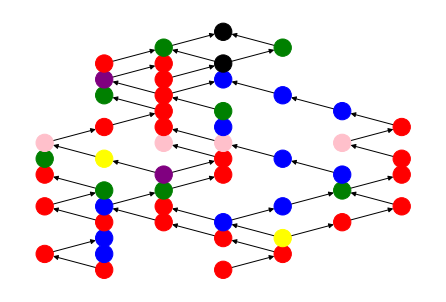

In [7]:
D, label_map, pos_map, color_map = mapGraph(line)
nx.draw(D, pos_map, node_color = color_map, with_labels = False)

In [8]:
# applies two basic reductions:
    #### SAME NEIGHBORHOOD ####
    # if A, B have same labels
    # and A, B have same (outgoing) neighborhood
    # then delete A or B
    
    #### SUBSET NEIGHBORHOOD ####
    # if A, B have same labels
    # and N_+(A) is a subset of N_+(B)
    # and N_-(A) equals N_-(B)
    # then delete A

# finds a pair of vertices with same labels & neighbors
def sameNeighbors(D, rows, labels):
    for y in range(14, 0, -1):
        for (n1, n2) in it.combinations(rows[y], 2):
            if labels[n1] == labels[n2]:
                out1, out2 = set(D.neighbors(n1)), set(D.neighbors(n2))
                if out1 == out2:
                    #print(n1, n2, "same label/neighbor")
                    return n1, n2
                if out1.issubset(out2):
                    in1, in2 = set(D.predecessors(n1)), set(D.predecessors(n2))
                    if in1 == in2:
                        return in2, in1
                if out2.issubset(out1):
                    in1, in2 = set(D.predecessors(n1)), set(D.predecessors(n2))
                    if in2 == in1:
                        return in1, in2
                
                
def basicReductions(D, labels):
    rows = [set() for i in range(16)]
    for node in D.nodes():
        rows[node[1]].add(node)
    out = sameNeighbors(D, rows, labels)
    while out:
        n1, n2 = out
        #print("contracting", n1, n2)
        #print("nodes before:", D.nodes())
        nx.contracted_nodes(D, n1, n2, copy = False)
        rows[n2[1]].remove(n2)
        #print("nodes after:", D.nodes())
        out = sameNeighbors(D, rows, labels)

In [9]:
basicReductions(D, label_map)

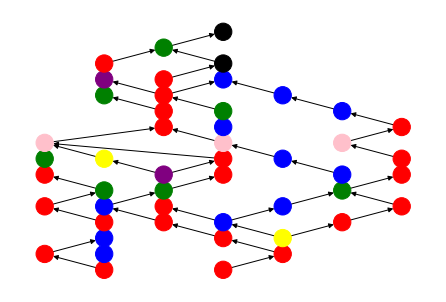

In [10]:
new_colors = [COLORS[label_map[node]] for node in D.nodes()]
nx.draw(D, pos_map, node_color = new_colors, with_labels = False)

In [11]:
len(D.nodes())

49

In [12]:
#### write a method to find all endo-epimorphic functions of a sts map ####

# given two vertex-labeled digraphs G, H, 
# a function f:V(G) --> V(H) is epimorphic if:
#     1. f is surjective, 
#     2. f preserves vertex labels, and 
#     3. f preserves neighborhood sets, i.e., 
#         for all u in V(G), 
#             N_+(f(u)) = f(N_+(u))

#### START row-by-row-mapping ####
# extends the dictionaries in rowMaps by mapping the nextNode to a target
def extensionsExtender(rowMaps, nextNode, targets):
    nextRowMaps = []
    for rowMap in rowMaps:
        for target in targets:
            nextRowMaps.append(dict())
            for node in rowMap:
                nextRowMaps[-1][node] = rowMap[node]
            nextRowMaps[-1][nextNode] = target
    return nextRowMaps

# unit testing #
print("testing extensionsExtender...")
for nextMap in extensionsExtender([dict()], (1,0), set([(0,1), (1,1), (2,1)])):
    print(nextMap)
print()

# finds all label-preserving dictionaries on a row of nodes
def allExtensions(targets):
    rowMaps = [dict()]
    for node in targets:
        rowMaps = extensionsExtender(rowMaps, node, targets[node])
    return rowMaps

# unit testing #
print("testing allExtensions...")
for nextMap in allExtensions({1:set([4,5,6]), 2:set([4,6]), 3:set([5,6])}):
    print(nextMap)
print()

# tests if for all u in currMap:
#     N_+(currMap[u]) = {nextMap[v] for v in N_+(u)}
def locallyEndomorphic(D, currMap, nextMap):
    for u in currMap:
        remapNeigh = set([nextMap[v] for v in D.neighbors(u)])
        neighRemap = set(D.neighbors(currMap[u]))
        if remapNeigh != neighRemap:
            return False
    return True
#### END row-by-row-mapping ####

#### START ####
def endoEpi(D, labels):
    
    rows = [set() for i in range(16)]
    for node in D.nodes():
        rows[node[1]].add(node)
    
    # where can rows[0] nodes go?
    currTargets = dict()
    for node in rows[0]:
        # if labels are the same (redundant on row[0])
        currTargets[node] = rows[0].copy()
    currMaps = allExtensions(currTargets)
    
    
    # where can row[1] nodes go? 
    nextTargets = dict()
    for node in rows[1]:
        nextTargets[node] = set()
        for node2 in rows[1]:
            if labels[node2] == labels[node]:
                nextTargets[node].add(node2)
    nextMaps = allExtensions(nextTargets)
    
    for currMap in currMaps:
        for nextMap in nextMaps:
            if locallyEndomorphic(D, currMap, nextMap):
                print(currMap, "&", nextMap)

testing extensionsExtender...
{(1, 0): (0, 1)}
{(1, 0): (1, 1)}
{(1, 0): (2, 1)}

testing allExtensions...
{1: 4, 2: 4, 3: 5}
{1: 4, 2: 4, 3: 6}
{1: 4, 2: 6, 3: 5}
{1: 4, 2: 6, 3: 6}
{1: 5, 2: 4, 3: 5}
{1: 5, 2: 4, 3: 6}
{1: 5, 2: 6, 3: 5}
{1: 5, 2: 6, 3: 6}
{1: 6, 2: 4, 3: 5}
{1: 6, 2: 4, 3: 6}
{1: 6, 2: 6, 3: 5}
{1: 6, 2: 6, 3: 6}



In [13]:
endoEpi(D, label_map)

{(1, 0): (1, 0), (3, 0): (3, 0)} & {(0, 1): (0, 1), (1, 1): (1, 1), (4, 1): (4, 1)}
